# 1:Importing libraries

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()
import numpy as np 
import pandas as pd

# 2: Reading Data

In [3]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")
data.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [6]:
data.tail()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0
260639,260639,30/6/2007,23:59:00,2.548,0.354,239.25,10.6,0,1,17.0


In [7]:
data.shape

(260640, 10)

In [9]:
data.sample()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
103795,103795,14/3/2007,1:55:00,0.392,0.116,241.08,1.8,0,1,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [12]:
data.describe()

,index,Sub_metering_3
count,260640.000000,256869.000000
mean,130319.500000,5.831825
std,75240.431418,8.186709
min,0.000000,0.000000
25%,65159.750000,0.000000
50%,130319.500000,0.000000
75%,195479.250000,17.000000
max,260639.000000,20.000000


# 3: Data Cleaning

In [13]:
import pandas as pd
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")


In [14]:
data.isnull().sum()

index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [15]:
import pandas as pd
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True)   
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)
missing_values = data.isnull().sum()
print(missing_values)

index                    0
Sub_metering_3           0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
dtype: int64


In [16]:
import pandas as pd
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True) 
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True) 
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)
missing_values = data.isnull().sum()
print(missing_values)

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_10760\3755400923.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)


index                    0
Sub_metering_3           0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
dtype: int64


In [17]:
data.shape

(260640, 10)

# 4:Handling Missing Data

Removal: Deleting rows with missing values.
-

In [18]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")
data.isnull().sum()

index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [19]:
data.shape

(260640, 10)

In [20]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)

index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [21]:
data.shape

(256869, 10)

Removing Duplicates
-

In [22]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")
data.shape

(260640, 10)

In [23]:
data.drop_duplicates(inplace=True)
data.shape

(260640, 10)

# 5: Outlier Detection and Removal

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")
data.describe()

,index,Sub_metering_3
count,260640.000000,256869.000000
mean,130319.500000,5.831825
std,75240.431418,8.186709
min,0.000000,0.000000
25%,65159.750000,0.000000
50%,130319.500000,0.000000
75%,195479.250000,17.000000
max,260639.000000,20.000000


In [25]:
0.25-1.5*0.5


-0.5

In [26]:
0.75 + 1.5 * 0.5

1.5

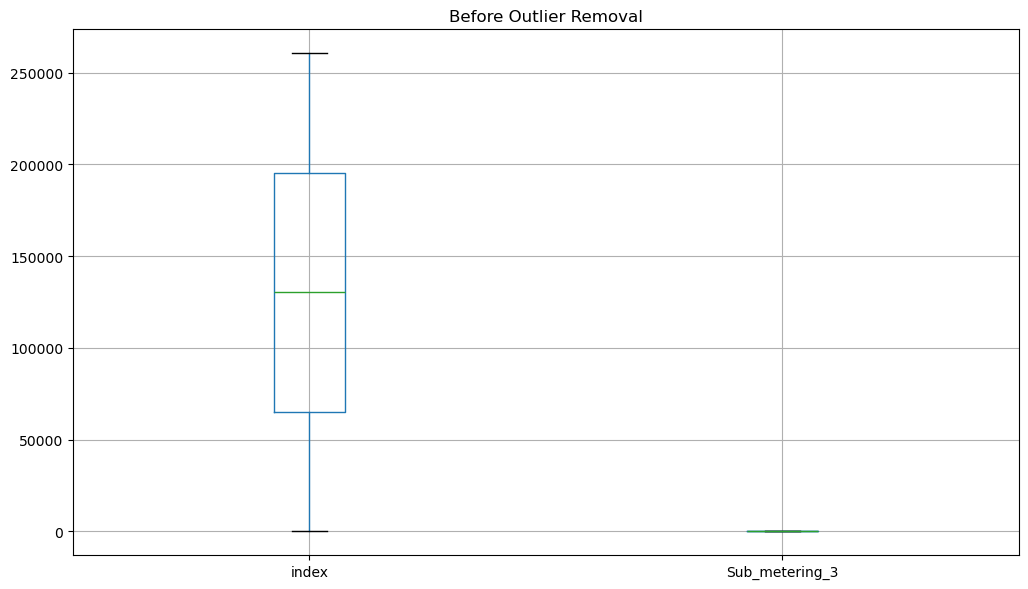

In [27]:
numeric_cols = data.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

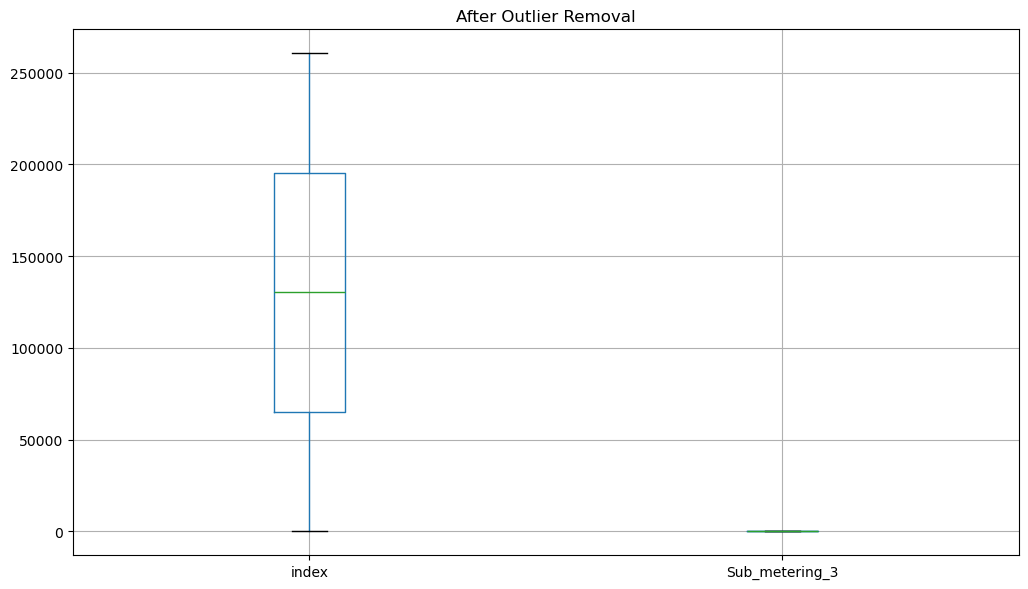

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

In [29]:
data_cleaned.shape

(260640, 10)

In [30]:
data_cleaned.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


# 6. Encode categorical variables

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")
data.head(2)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0


In [4]:
data["Global_active_power"].unique()

array(['2.58', '2.552', '2.55', ..., '7.022', '4.592', '6.152'],
      dtype=object)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

data1 = pd.get_dummies(cat_features)
data1

,Date,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Time,Voltage
0,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True
5,False,False,True,False,False,False,False,False
6,False,False,False,False,True,False,False,False
7,False,False,False,False,False,True,False,False


# 7: Splitting Data

In [6]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

X = data.drop('Global_active_power', axis=1)
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 8. Data Transformation


Normalization
-

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(260640, 10)

************************************************************


,index,Sub_metering_3,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,0.000000,0.0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0
1,0.000004,0.0,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0
2,0.000008,0.0,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0
3,0.000012,0.0,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0
4,0.000015,0.0,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0


Standardization
-

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(260640, 10)

************************************************************


,index,Sub_metering_3,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,-1.732044,-0.712354,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0
1,-1.732031,-0.712354,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0
2,-1.732018,-0.712354,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0
3,-1.732004,-0.712354,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0
4,-1.731991,-0.712354,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0


# regression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

data = data.dropna()

In [47]:
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [51]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.028019044975392402
MSE: 0.0019714629229608998
RMSE: 0.044401159027224725
R2 Score: 0.9985744556597952


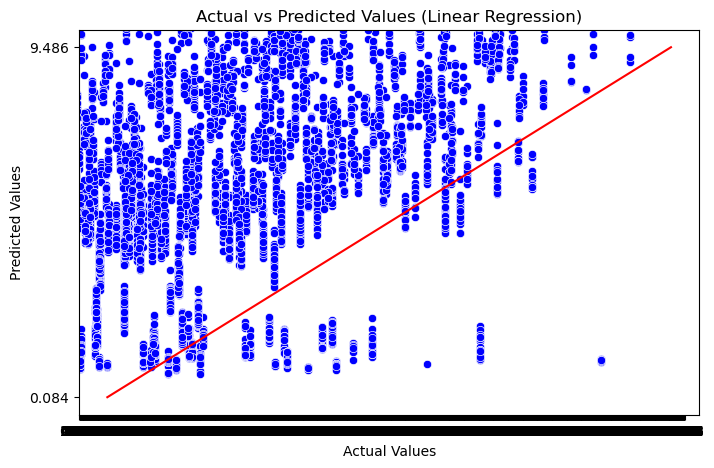

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

X = data[['Voltage']]
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Simple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

ValueError: could not convert string to float: '?'